In [1]:
%matplotlib inline
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import katarchive
import katdal as katfile
import katfile
import datetime

import logging
logging.root.setLevel(logging.ERROR)


In [4]:
def findproj(text):
    chx=text.find('--pro')  # matches 'project-id and proposal-id'
    if chx >0  :
        pr2=text[chx+13:chx+40].split()
        code=pr2[0]
        found=code.replace("=","")
    else:
        found='Unknown'
    return found


In [5]:
begindate="01/01/2014"
#projectname="20130905MS-01"
projectname="20141111-CR01"
#projectname="20150317AR-01"

In [6]:
today=datetime.datetime.today()
print today
end=today.strftime(format="%d/%m/%Y")

2015-08-31 11:09:05.823275


In [7]:
#print katarchive.search_archive(startdate=begindate,enddate=end)


In [8]:
f = katarchive.search_archive(startdate=begindate)
start = datetime.datetime.strptime(f[-1].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')
end = datetime.datetime.strptime(f[0].__str__().split('\'')[3],'%Y-%m-%d %H:%M:%S %Z')

Searched using: CAS.ProductTypeName:(KatFile) AND CAS.ProductTransferStatus:RECEIVED AND StartTime:[2013-12-31T22:00:00Z TO 2015-08-31T21:59:59Z]
Returning 7752 results


In [9]:
print 'First file in run: ' , start.isoformat()
print 'Last file in run: ' , end.isoformat()

First file in run:  2014-01-06T12:15:35
Last file in run:  2015-08-31T00:56:15


In [10]:
total=0.0
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    #print p
    if  projectname in p:  
        #print "Found",p,"======================="
        total=total+fi.metadata.Duration
        print p,fi.metadata.Duration, fi.metadata.Description      
        
print "Total",total/3600., "Hours"


20141111-CR01 21660.3 Sco_Cluster
20141111-CR01 9160.13 Sco_Cluster
20141111-CR01 21740.3 Sco_Cluster
20141111-CR01 21860.3 Sco_Cluster
20141111-CR01 17970.25 Sco_Cluster_1328
20141111-CR01 18150.25 Sco_Cluster
20141111-CR01 7170.1 Sco_Cluster
20141111-CR01 6920.1 Scorpius Cluster mosaic
20141111-CR01 21900.3 Sco_Cluster_1328
20141111-CR01 21880.3 Sco_Cluster
20141111-CR01 19920.28 Scorpius Cluster mosaic
20141111-CR01 17850.25 Scorpius Cluster mosaic
Total 57.2730166667 Hours


In [11]:
print txts

/home/kat/scripts/observation/auto_attenuate.py -f 1822 -t radec,0,-90 --mode=c16n400M1k --sb-id-code=20140106-0001 --description= AutoAttenuation for 00ob2000000 --observer=operator


Only select observations that are longer than 1 hrs then extract the project id from the script parameters. If there is no project id then allocated No_project_id 

In [12]:
projectname="20141111CR-01"

In [13]:
total=0.0
for fi in f:
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    #print p
    if  projectname in p:  
        #print "Found",p,"======================="
        total=total+fi.metadata.Duration
        print p,fi.metadata.Duration, fi.metadata.Description      
        
print "Total",total/3600., "Hours"


20141111CR-01 21860.3 Sco_Cluster_1328
Total 6.07230555556 Hours


In [14]:
sbd = [] #Experiment ID
pid = [] #project ID
fnd = [] #Filename
dud = [] #Duration
antsd = [] #number of antennas
scrd = [] #script  -NOT USED NOW

for fi in f:
    if fi.metadata.Duration < 3600: #only pick hour long or greater observations for analysis
        continue
    # now try extract the project-id from the instruction-set string
    """
    script = fi.metadata.InstructionSet
    scrd.append(script)
    spl = script.split()
    """
    txts=fi.metadata.InstructionSet
    p=findproj(txts)
    sbd.append(fi.metadata.ExperimentID)
    pid.append(p)
    fnd.append(fi.metadata.Filename)
    dud.append(fi.metadata.Duration)
    antsd.append(len(fi.metadata.Antennas))


In [15]:
pi = np.array(pid)
sb = np.array(sbd)
du = np.array(dud)
ants = np.array(antsd)

p_cent = (sum(du)/((end.toordinal()-start.toordinal())*24*3600))*100

print 'Percentage system usage: ', np.floor(p_cent),'%'


Percentage system usage:  77.0 %


In [16]:
a_id = []
a_time = []
for p in set(pi):
    ind = pi == p
    print p,round(sum(du[ind])/3600,2)
    a_id.append(p)
    a_time.append(round(sum(du[ind])/3600,2))

 2.33
20131015GB-02 15.12
Unknown 1139.3
20140529GB-01 12.63
20140520RA-01 51.62
201410161NO-01 39.09
20140513DL-01 119.88
20130925KH-01 30.19
20150522RA-01 24.1
20141002MB-01 143.0
20150619TF-01 81.57
20140624CC-01 164.12
20150210SS-01 639.76
20150120TF-01 22.35
COMM_Noise 4.73
20140225RA-01 108.0
COMM_bandpass_SG 24.16
COMMTEST 626.18
20140527TF-01 372.74
20150127CC-01 8.26
20140512TM-01 39.77
COMM_Delay_TF 31.86
20150821SP-01 7.79
20150421TF-01 81.22
20150522AR-01 42.33
20141014LR-01 118.21
20141202BN-01 229.55
20130821TM-01 27.63
20140722CC-01 160.69
20140923CR-01-- 6.36
20141111-CR01 57.27
COMTEST 9.51
COMM-RTS 124.81
20141111-IM01 106.74
20140728MB-01 18.05
COMM_RFI_SP 419.47
COMM_Point_LM 275.04
20140923CR-01--description 6.06
20130821SG-01 647.51
20141125NO-01 25.46
COMM_DELAY_TF 10.0
20140120OP-01 14.16
20141007SS-01 77.95
20140122RC-01 175.96
COMM_Gain_MdV 79.73
ck-id320ob282166303 6.17
20140610AS-01 12.69
20140225RA 8.08
20140513SG-01 622.08
20140116NO-01 16.12
20141118NO-01

In [17]:
ind = np.argsort(a_id)
for i in ind:
    print ("%-16s %5.1f %d") %(a_id[i],a_time[i],ants[i])

                   2.3 4
20130821SG-01    647.5 5
20130821TM-01     27.6 5
20130822NO-01    322.9 5
20130822OP-02    1045.1 5
20130905MS-01      8.3 5
20130925KH-01     30.2 5
20130925SG-02     21.6 5
20131015GB-02     15.1 4
20131103DL-01     74.8 5
20131211DL-01     57.8 5
20131211NO-01    200.9 5
20140107RA-01     25.2 5
20140114AS-01     35.3 5
20140116NO-01     16.1 5
20140120OP-01     14.2 5
20140122RA-01     81.0 5
20140122RC-01    176.0 5
20140221NO-01     12.1 5
20140225RA         8.1 5
20140225RA-01    108.0 5
20140512TM-01     39.8 5
20140513DL-01    119.9 5
20140513SG-01    622.1 5
20140520RA-01     51.6 4
20140527RA-01      3.1 5
20140527TF-01    372.7 5
20140529GB-01     12.6 4
20140603MC-01    239.2 5
20140610AS-01     12.7 5
20140624CC-01    164.1 5
20140722CC-01    160.7 5
20140728MB-01     18.1 5
20140729RT-01    287.9 5
20140812NO-01     11.6 5
20140923CR-01      6.3 5
20140923CR-01--    6.4 5
20140923CR-01--description   6.1 5
20140923TO-01     95.0 5
20140923YL-01 

Find the unique project ids and determine the total observation duration.

Sort ID and time for display

Plot as pie-chart

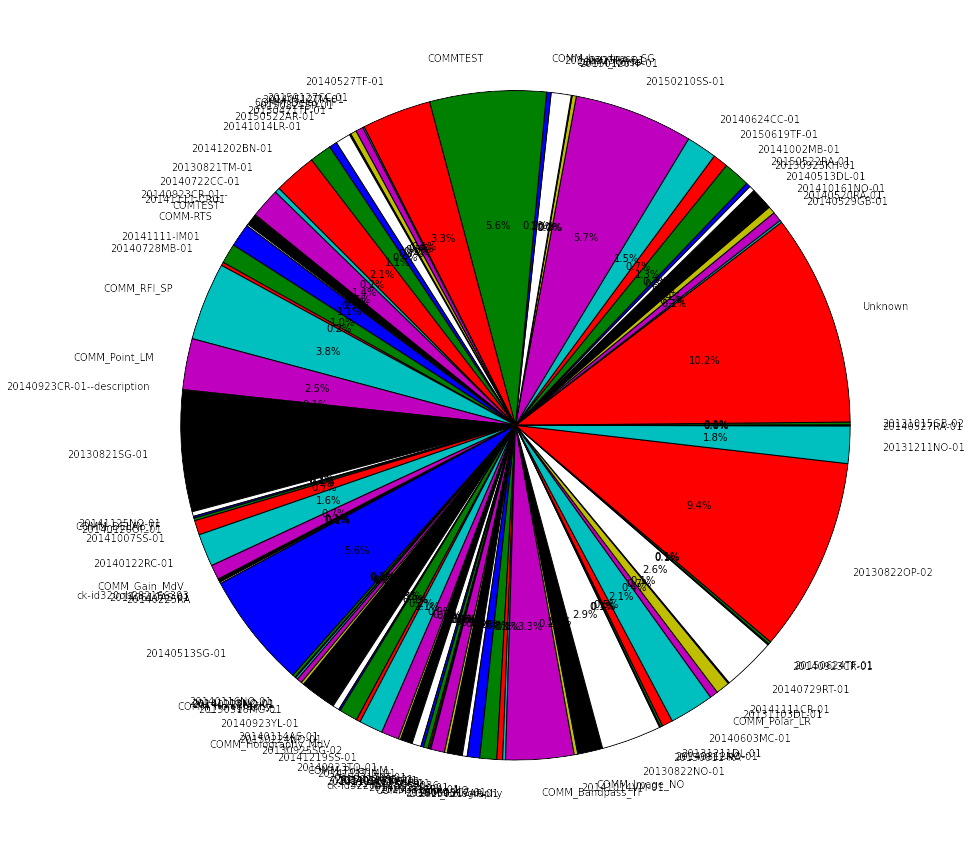

In [18]:
plt.figure(figsize=(15,15))
plt.pie(a_time,labels=a_id,autopct='%1.1f%%');

In [19]:
plt.show()

In [20]:
len(antsd)

2387

In [21]:
allobs=0
numberofn=[]
for nant in range(1,8):                 # from 1 to 7 antennas
    print nant, antsd.count(nant)       # how many have that count
    numberofn.append(antsd.count(nant))
    allobs=allobs+antsd.count(nant)
print numberofn
print nant
            

1 5
2 10
3 2
4 50
5 342
6 757
7 1221
[5, 10, 2, 50, 342, 757, 1221]
7


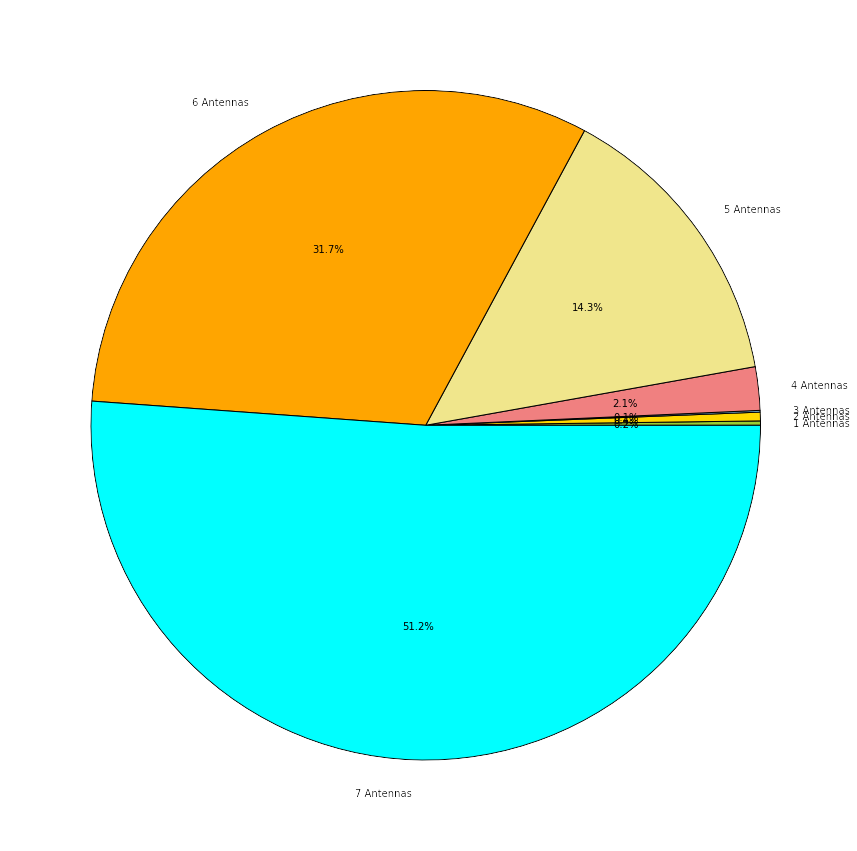

In [22]:
labs=[]
for n in range(7):
    labs.append(str(n+1)+" Antennas")

#cmap = plt.cm.prism
#colors = cmap(np.linspace(0., 1., 7))
colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','khaki','orange','cyan']
y=np.array(numberofn)
plt.figure(figsize=(15,15))
plt.pie(y,labels=labs,colors=colors, autopct='%1.1f%%')
plt.show()